 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [133]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [134]:
Whale_returns_csv = r"C:\Users\Aarthi Manoharan\Arun\Module 4 Challenge\Starter_Code\Resources\whale_returns.csv"
algo_returns_csv = r"C:\Users\Aarthi Manoharan\Arun\Module 4 Challenge\Starter_Code\Resources\algo_returns.csv"
sp_tsx_history_csv = r"C:\Users\Aarthi Manoharan\Arun\Module 4 Challenge\Starter_Code\Resources\sp_tsx_history.csv"

In [135]:
# Reading whale returns
whale_returns_df = pd.read_csv(Whale_returns_csv,index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [136]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [137]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [138]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns_csv,index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [139]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [140]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [141]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv,index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [142]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [143]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(',','', regex=True)
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace('$','', regex=True)
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype(float)
sp_tsx_history_df.dtypes

Close    float64
dtype: object

In [144]:
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [145]:
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].astype(float)
sp_tsx_history_df['Close'].dtypes

dtype('float64')

In [146]:
# Calculate Daily Returns
sp_daily_returns = sp_tsx_history_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [151]:
# Drop nulls
sp_daily_returns.dropna(inplace=True)
sp_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [153]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns = sp_daily_returns.rename(columns={'Close': 'S&P 500 TSX 60'})
sp_daily_returns.head()

,S&P 500 TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [155]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_daily_returns], axis='columns', join='inner')
combined_df.head()                      

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

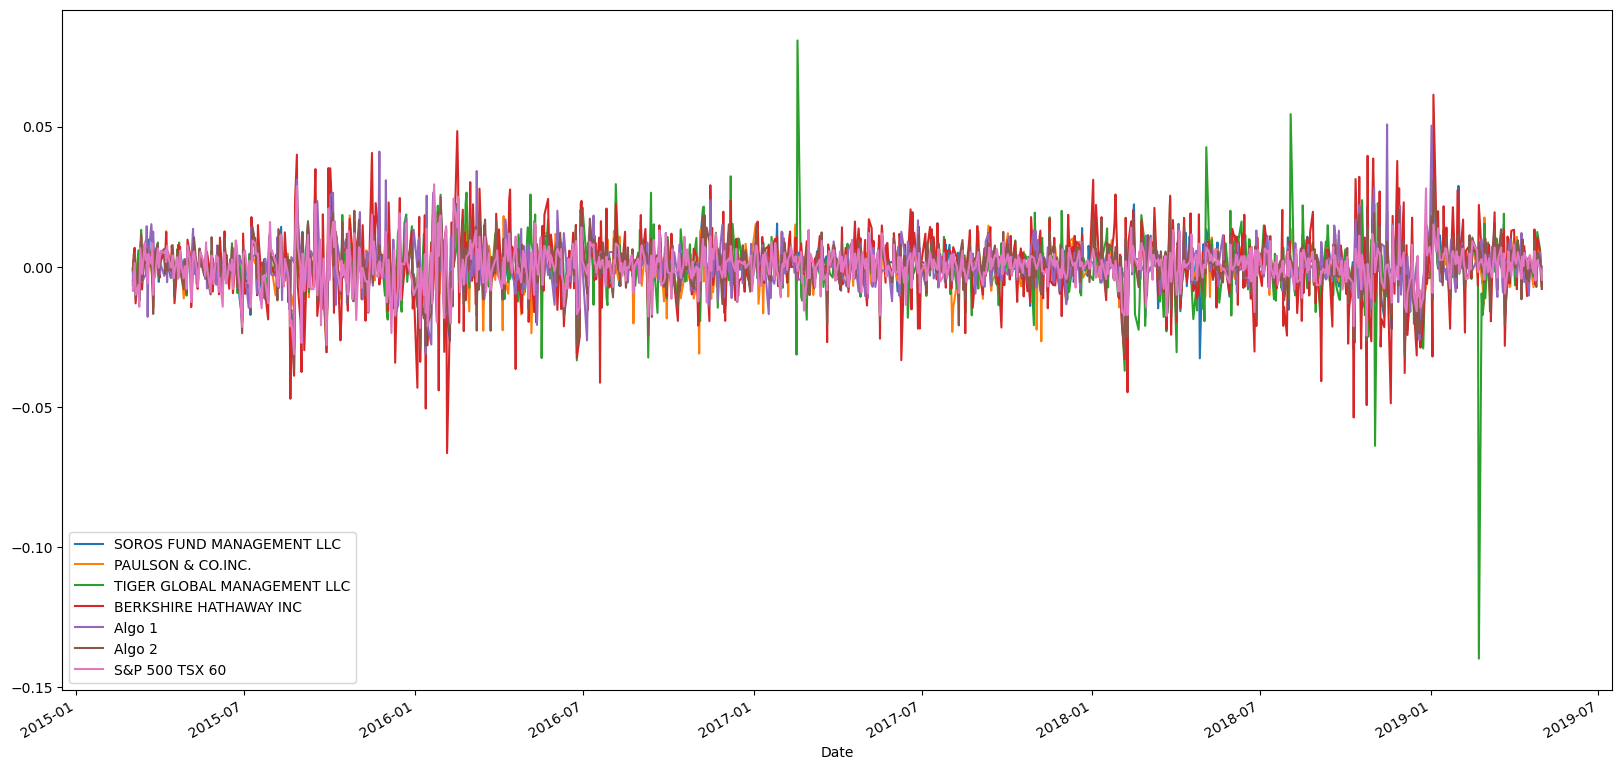

In [156]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

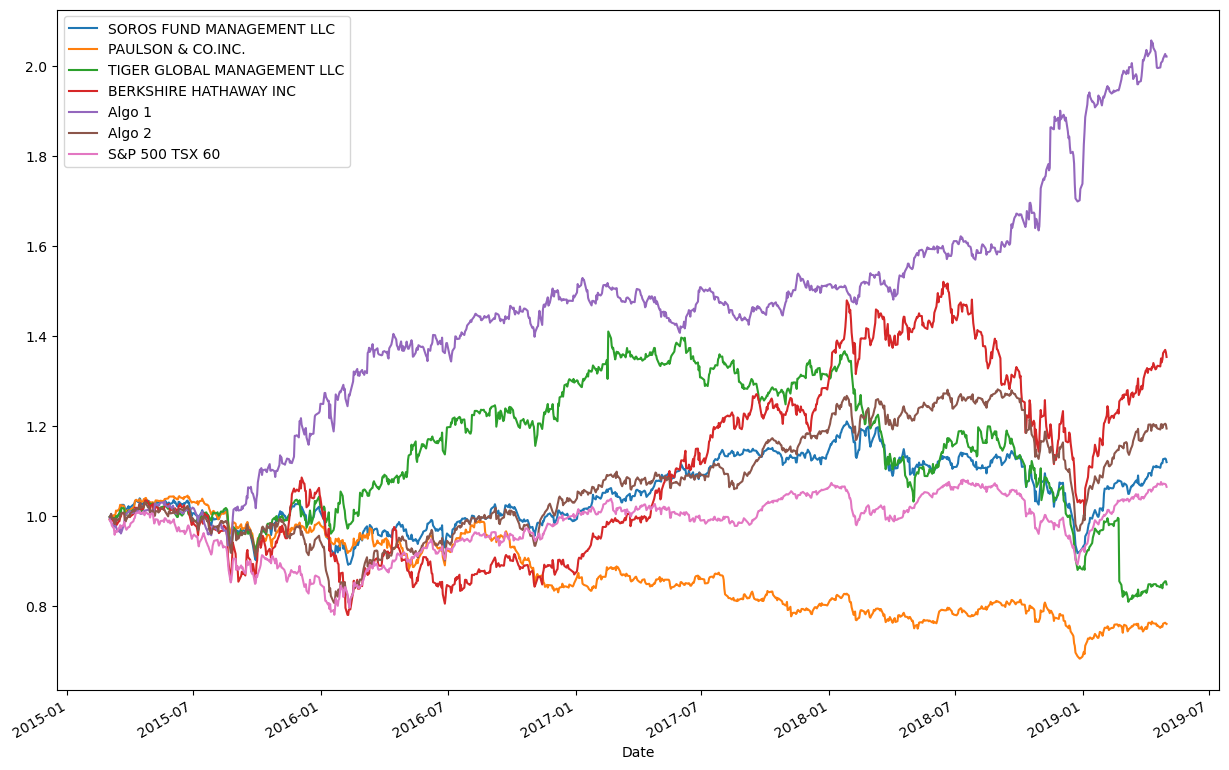

In [157]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

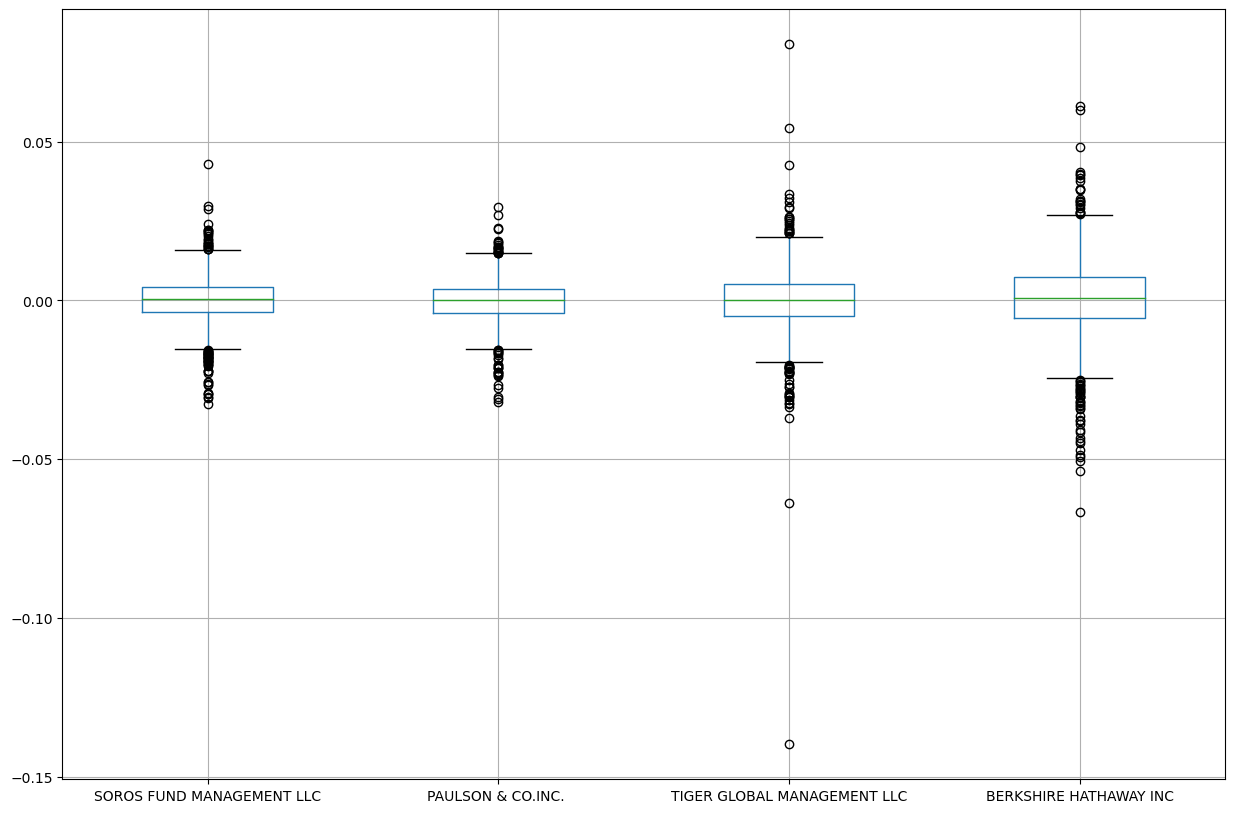

In [158]:
# Box plot to visually show risk
whale_returns_df.boxplot(figsize=(15,10))

<AxesSubplot:>

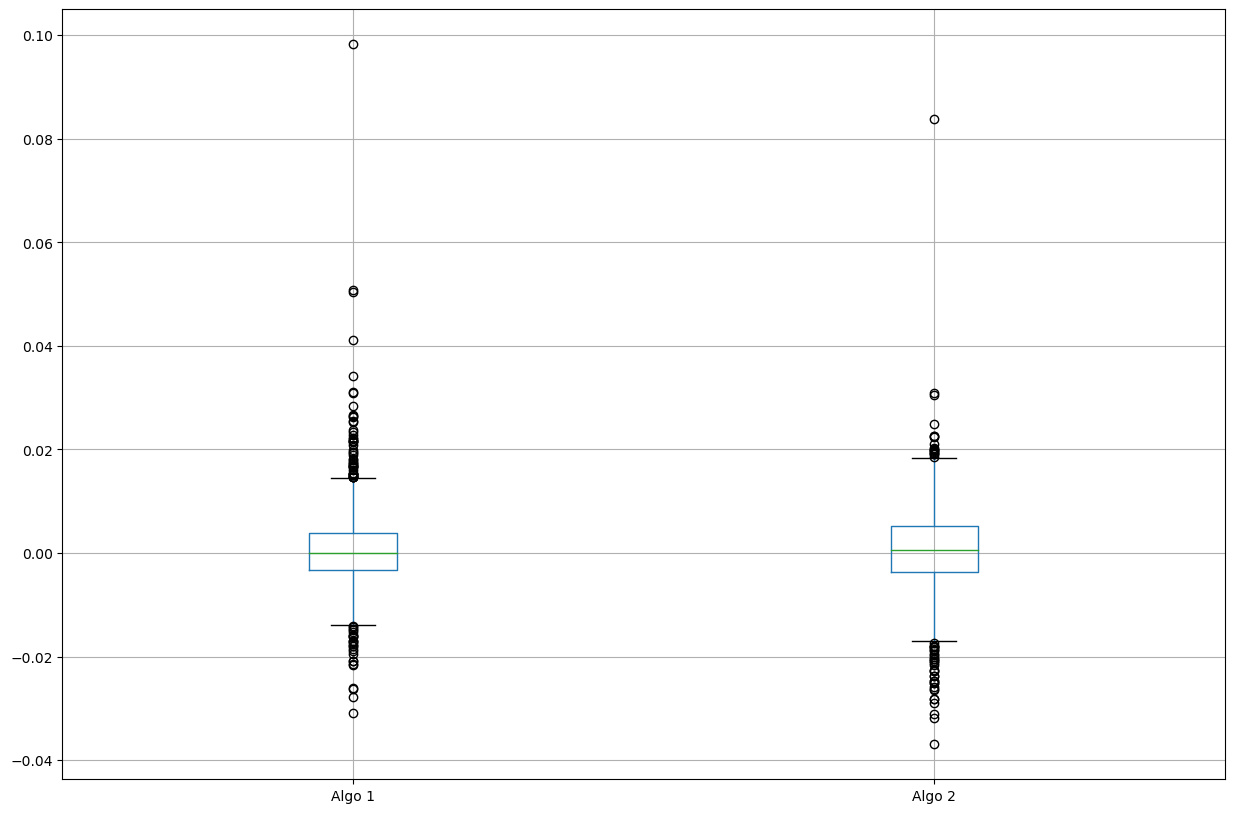

In [159]:
algo_returns_df.boxplot(figsize=(15,10))

<AxesSubplot:>

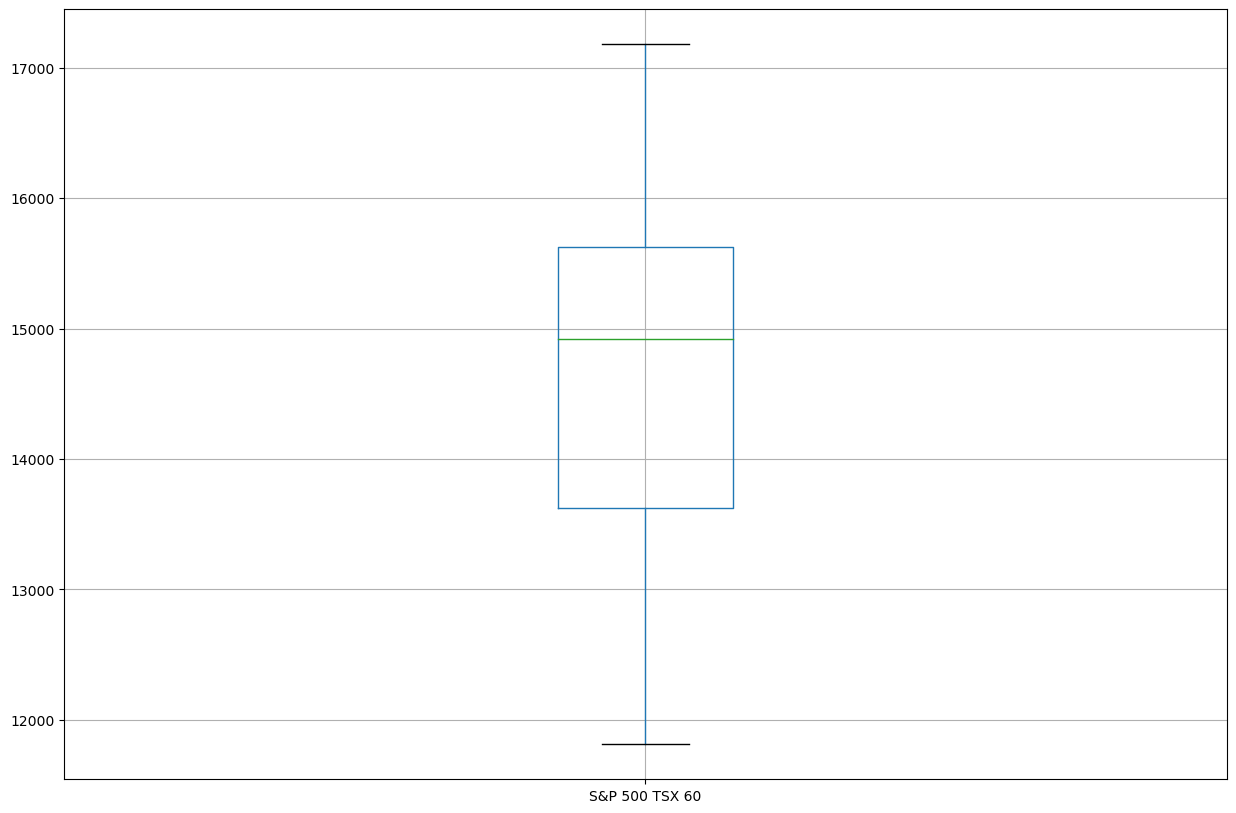

In [160]:
sp_tsx_history_df.boxplot(figsize=(15,10))

### Calculate Standard Deviations

In [162]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [163]:
# Calculate  the daily standard deviation of S&P TSX 60
sptsx_std =daily_std['S&P 500 TSX 60']

In [164]:
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P 500 TSX 60                 0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Calculate the Annualized Standard Deviation

In [165]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P 500 TSX 60                 0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

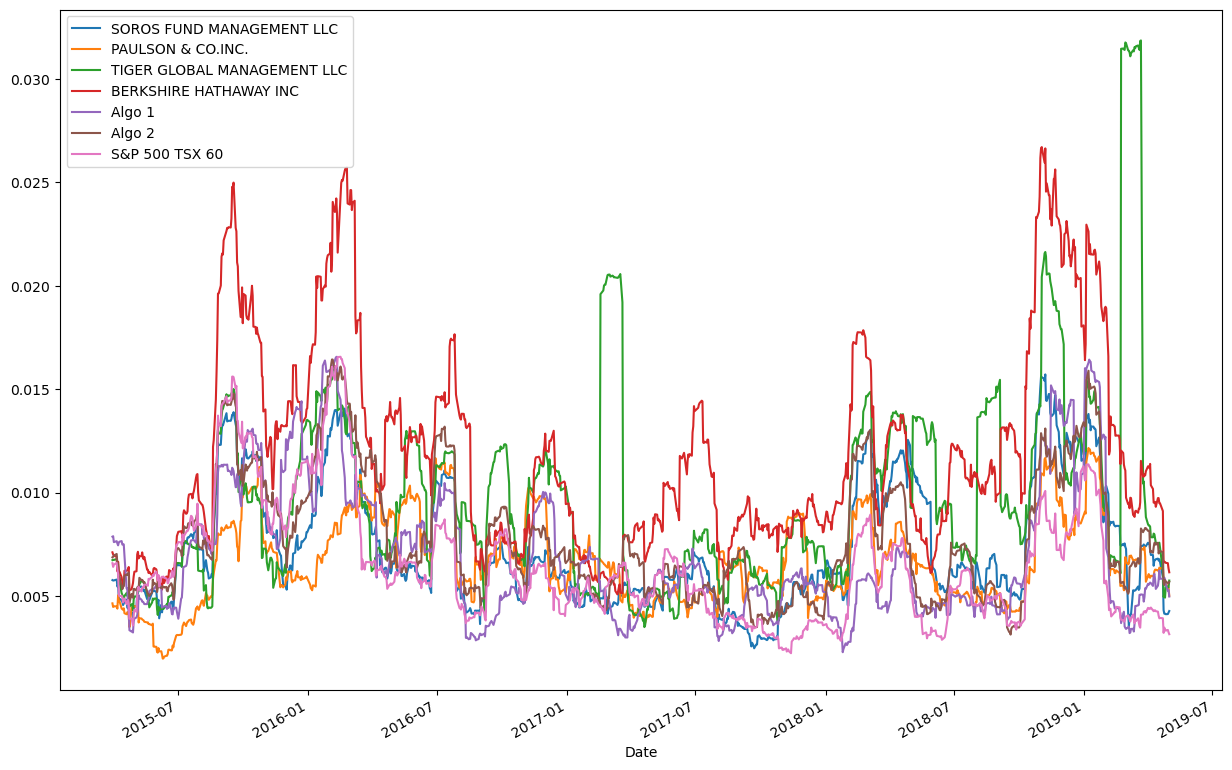

In [166]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_combined_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

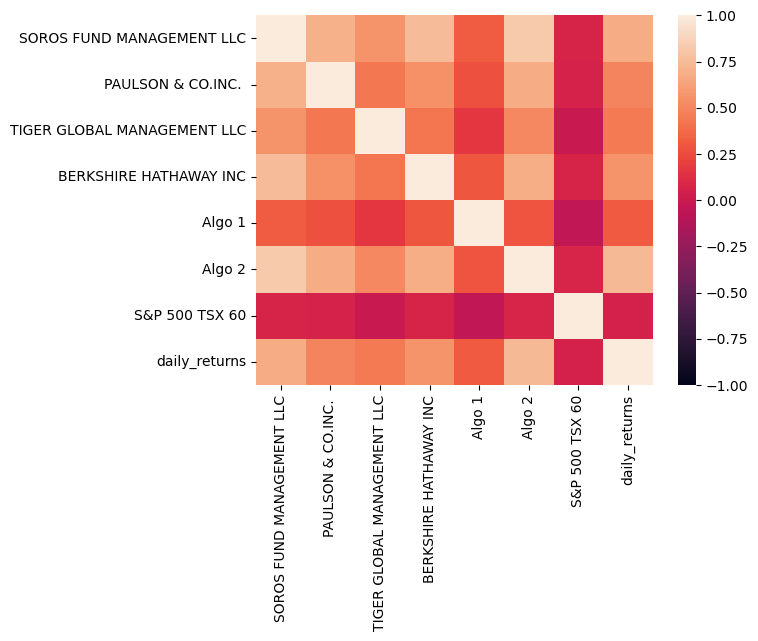

In [167]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(combined_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

[]

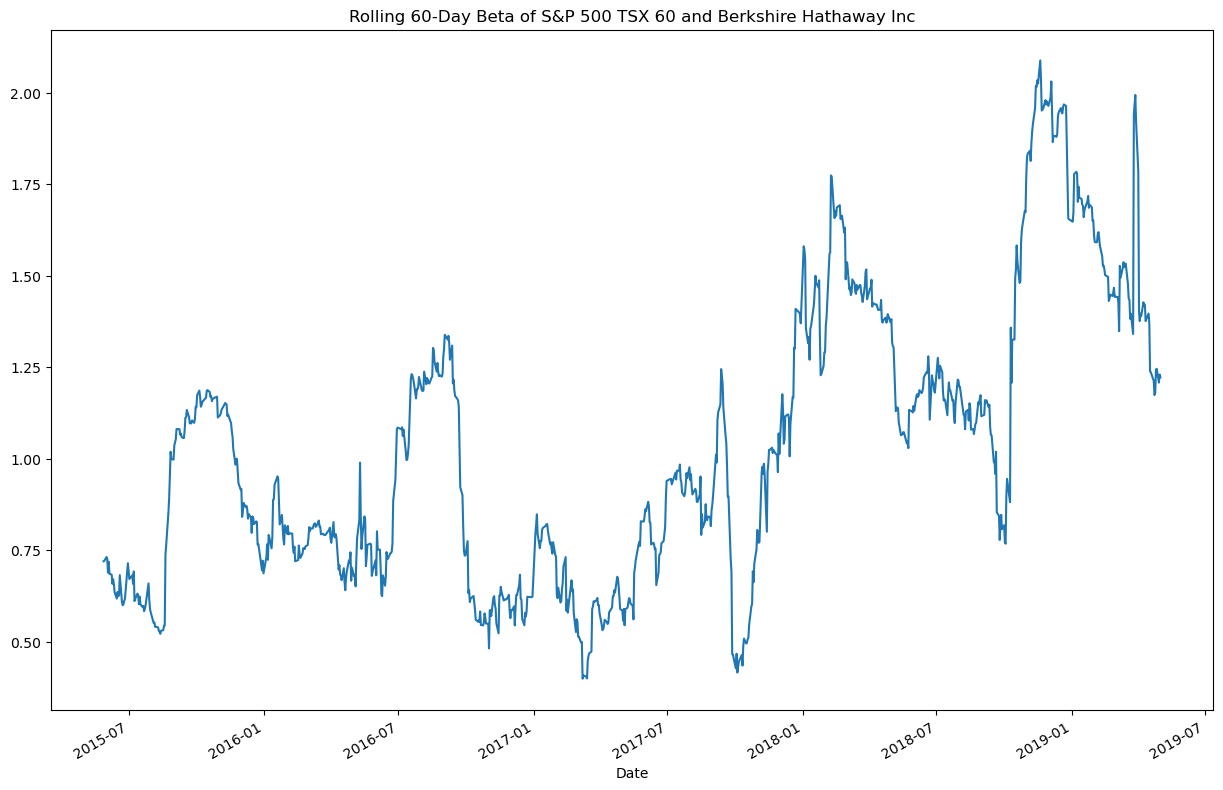

In [168]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['S&P 500 TSX 60'].rolling(window=60).cov(combined_df['BERKSHIRE HATHAWAY INC'])

# Calculate variance of S&P TSX
rolling_variance = combined_df['S&P 500 TSX 60'].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
ax = rolling_beta.plot(figsize=(15,10), title="Rolling 60-Day Beta of S&P 500 TSX 60 and Berkshire Hathaway Inc")
ax.plot(ax=ax)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

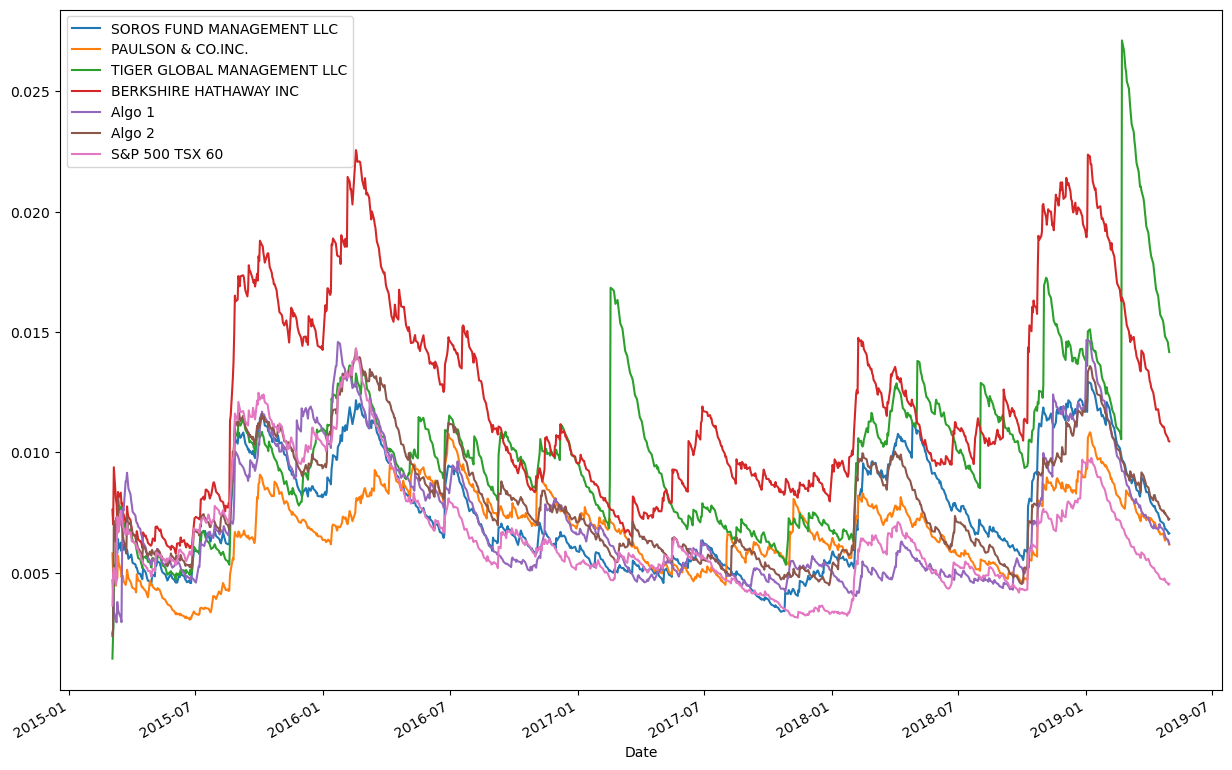

In [169]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(15,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [170]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean()  * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P 500 TSX 60                 0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

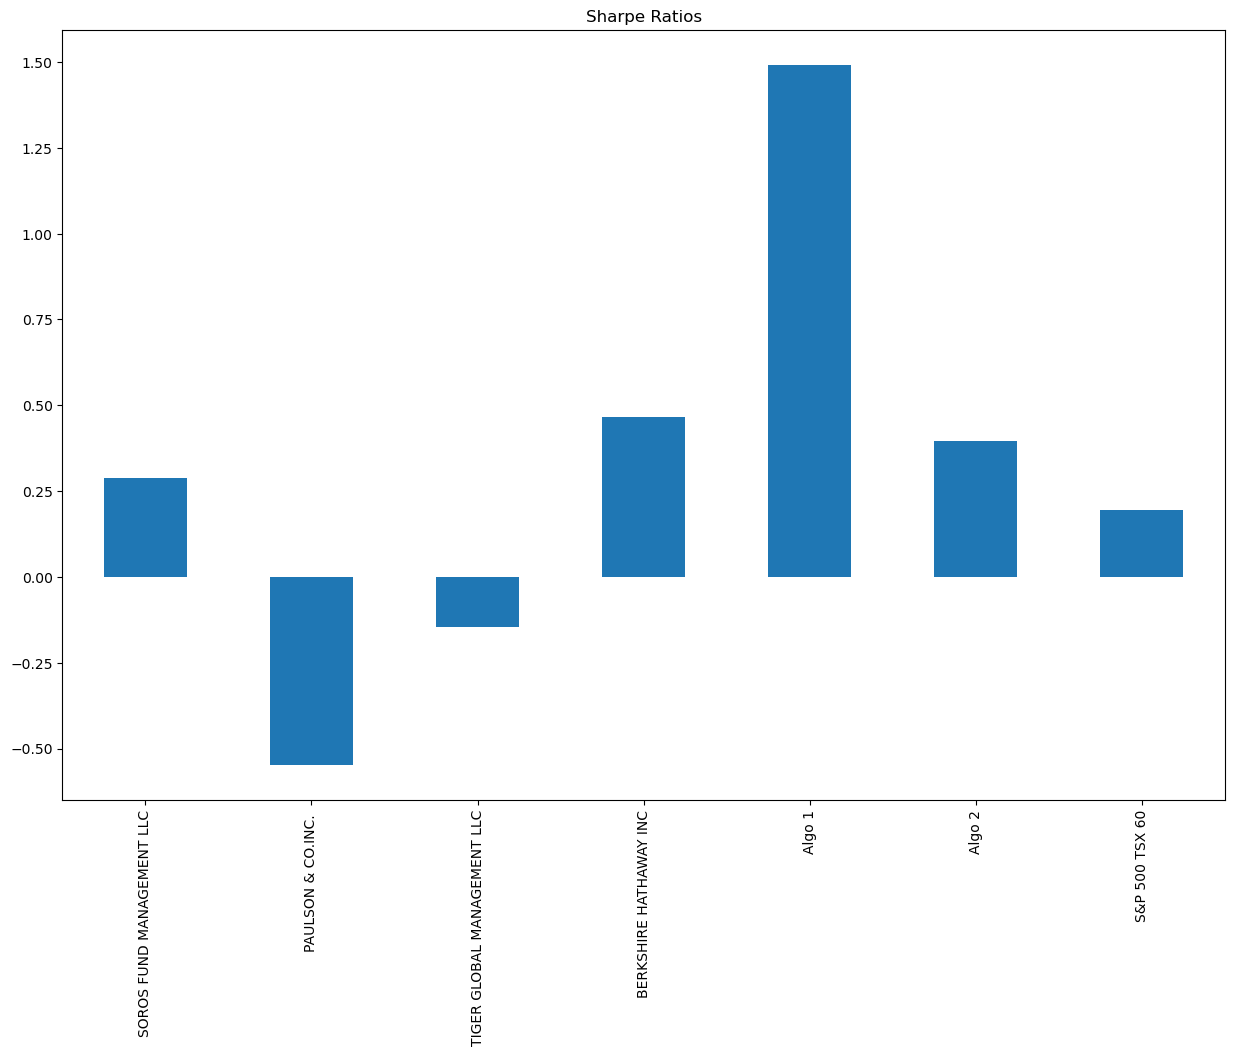

In [171]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(15,10), kind='bar',title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
# Highest Sharpe Ratio: Algo 1. It has outperformed both the whale portfolios and the market. 
# Algo 2 also has decent performance. It outperforms the market and some of the whale portfolios, however it has a lower Sharpe ratios than Soros Fund Management LLC and Tiger Global Management LLC.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [172]:
# Reading data from 1st stock
shop_path = r"C:\Users\Aarthi Manoharan\Arun\Module 4 Challenge\Starter_Code\Resources\shop_historical.csv"
shop_df = pd.read_csv(shop_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
shop_df = shop_df.rename(columns={'Close':'SHOPIFY'})
shop_df.head()

,Symbol,SHOPIFY
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [173]:
# Reading data from 2nd stock
import pandas as pd
l_path = r"C:\Users\Aarthi Manoharan\Arun\Module 4 Challenge\Starter_Code\Resources\l_historical.csv"
l_df = pd.read_csv(l_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
l_df =l_df.rename(columns={'Close':'LOBLAWS'})
l_df.head()

,Symbol,LOBLAWS
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [174]:
# Reading data from 3rd stock
otex_path = r"C:\Users\Aarthi Manoharan\Arun\Module 4 Challenge\Starter_Code\Resources\otex_historical.csv"
otex_df = pd.read_csv(otex_path,index_col='Date', infer_datetime_format=True, parse_dates=True)
otex_df = otex_df.rename(columns={'Close':'OPEN TEXT CORP'})
otex_df.head()

,Symbol,OPEN TEXT CORP
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [175]:
# Combine all stocks in a single DataFrame
stocks_combined_df = pd.concat([shop_df, l_df, otex_df], axis='columns', join='inner')
stocks_combined_df.head()

,Symbol,SHOPIFY,Symbol,LOBLAWS,Symbol,OPEN TEXT CORP
Date,,,,,,
2018-01-02,SHOP,132.06,L,57.99,OTEX,43.58
2018-01-03,SHOP,135.15,L,57.41,OTEX,43.07
2018-01-04,SHOP,137.46,L,57.42,OTEX,42.91
2018-01-05,SHOP,137.26,L,57.42,OTEX,42.57
2018-01-08,SHOP,139.51,L,56.86,OTEX,42.16


In [176]:
# Reset Date index
stocks_combined_df = stocks_combined_df.reset_index()
stocks_combined_df.head()

,Date,Symbol,SHOPIFY,Symbol,LOBLAWS,Symbol,OPEN TEXT CORP
0,2018-01-02,SHOP,132.06,L,57.99,OTEX,43.58
1,2018-01-03,SHOP,135.15,L,57.41,OTEX,43.07
2,2018-01-04,SHOP,137.46,L,57.42,OTEX,42.91
3,2018-01-05,SHOP,137.26,L,57.42,OTEX,42.57
4,2018-01-08,SHOP,139.51,L,56.86,OTEX,42.16


In [177]:
# Reorganize portfolio data by having a column per symbol
stocks_combined_df = stocks_combined_df.drop(columns=['Symbol'])
stocks_combined_df.columns = ['Date', 'SHOP', 'L', 'OTEX']
stocks_combined_df.sort_index()
stocks_combined_df.head()

,Date,SHOP,L,OTEX
0,2018-01-02,132.06,57.99,43.58
1,2018-01-03,135.15,57.41,43.07
2,2018-01-04,137.46,57.42,42.91
3,2018-01-05,137.26,57.42,42.57
4,2018-01-08,139.51,56.86,42.16


In [178]:
# Calculate daily returns
stocks_combined_df.set_index('Date', inplace=True)
stocks_combined_df.sort_index(inplace=True)
stocks_combined_df = stocks_combined_df.pct_change()
# Drop NAs
stocks_combined_df.dropna(inplace=True)

# Display sample data
stocks_combined_df.head()

,SHOP,L,OTEX
Date,,,
2018-01-03,0.023398,-0.010002,-0.011703
2018-01-04,0.017092,0.000174,-0.003715
2018-01-05,-0.001455,0.000000,-0.007924
2018-01-08,0.016392,-0.009753,-0.009631
2018-01-09,-0.011254,0.008969,-0.000712


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [179]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = stocks_combined_df.dot(weights)
# Display sample data
portfolio_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [180]:
# Join your returns DataFrame to the original returns DataFrame
join_all_data = pd.concat([portfolio_returns,combined_df],axis='columns',join='inner')
join_all_data.rename(columns={0:'MY PORTFOLIO'},inplace=True)
join_all_data.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 TSX 60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


In [181]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
join_all_data.dropna(inplace=True)
join_all_data.isnull().sum()

MY PORTFOLIO                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500 TSX 60                 0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [182]:
# Calculate the annualized `std`
annualized_std = join_all_data.std() * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.227445
MY PORTFOLIO                   0.224346
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&P 500 TSX 60                 0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

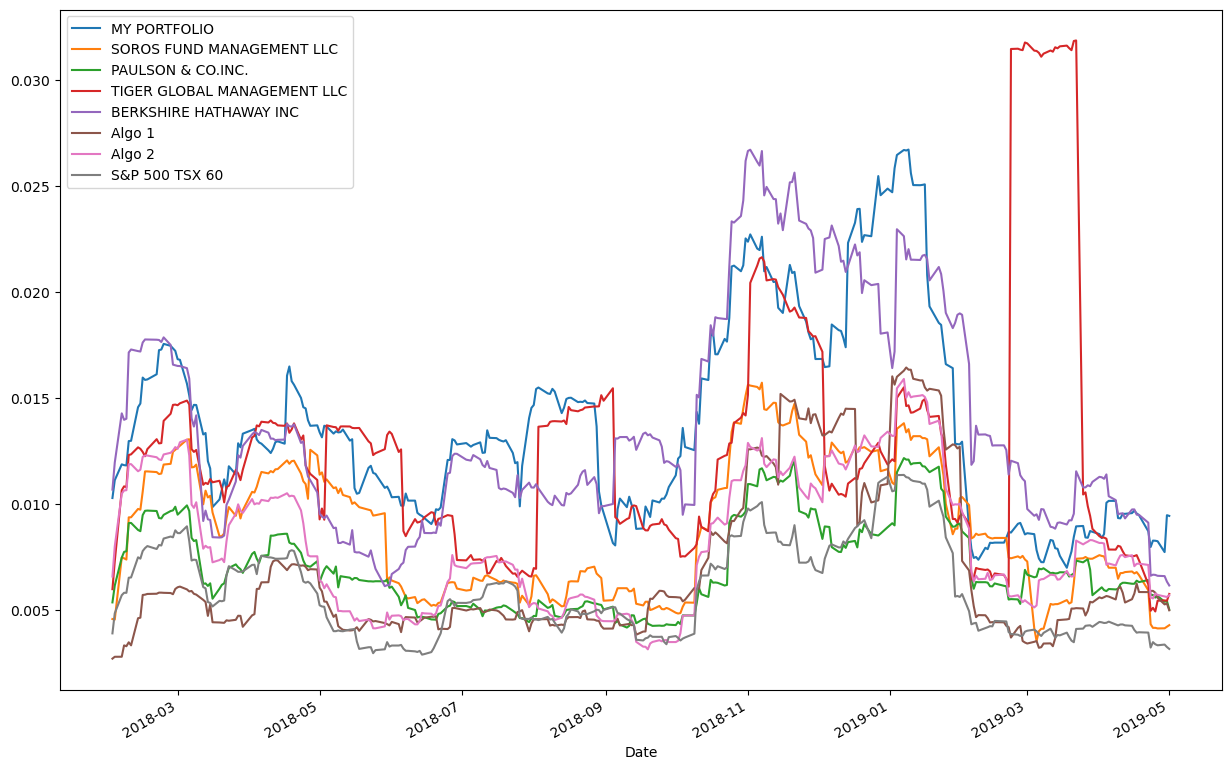

In [183]:
# Calculate rolling standard deviation
rolling_std = join_all_data.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(15,10))

### Calculate and plot the correlation

<AxesSubplot:>

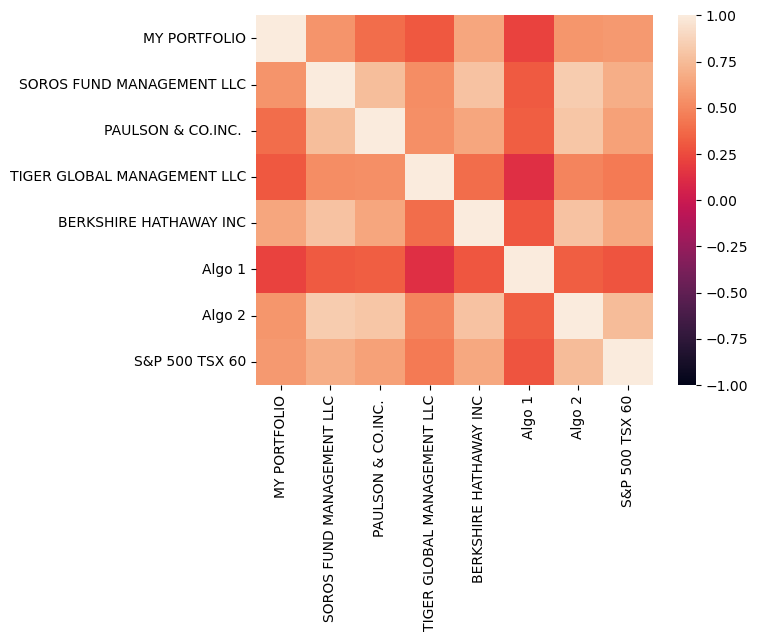

In [184]:
# Calculate and plot the correlation
import seaborn as sns
correlation = join_all_data.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60 Day Beta of My Portfolio'}, xlabel='Date'>

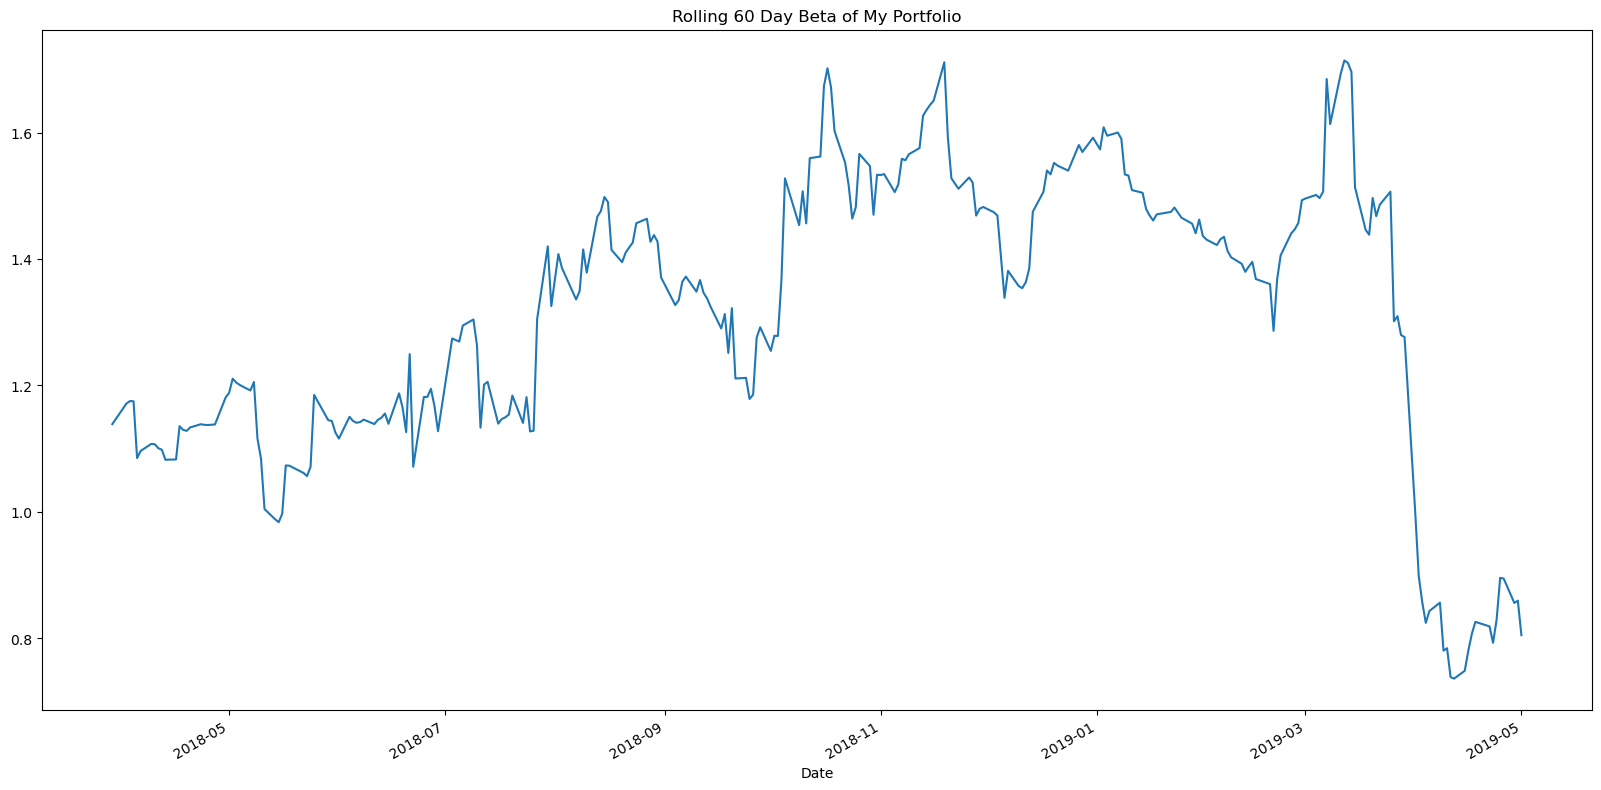

In [185]:
# Calculate and plot Beta
rolling_portfolio_covariance = join_all_data["MY PORTFOLIO"].rolling(window=60).cov(join_all_data["S&P 500 TSX 60"])
rolling_portfolio_variance = join_all_data["S&P 500 TSX 60"].rolling(window=60).var()
rolling_portfolio_beta = rolling_portfolio_covariance/rolling_portfolio_variance
rolling_portfolio_beta.plot(figsize=(20,10), title='Rolling 60 Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [186]:
# Calculate Annualized Sharpe Ratios
all_data_sharpe_ratios = (join_all_data.mean() * 252) / (join_all_data.std() * np.sqrt(252))
all_data_sharpe_ratios.sort_values(ascending=True)


TIGER GLOBAL MANAGEMENT LLC   -1.391612
PAULSON & CO.INC.             -0.396282
SOROS FUND MANAGEMENT LLC     -0.088196
Algo 2                         0.021394
S&P 500 TSX 60                 0.034651
BERKSHIRE HATHAWAY INC         0.195907
MY PORTFOLIO                   1.564547
Algo 1                         1.901461
dtype: float64

<AxesSubplot:title={'center':'My Portfolio Sharpe Ratio'}>

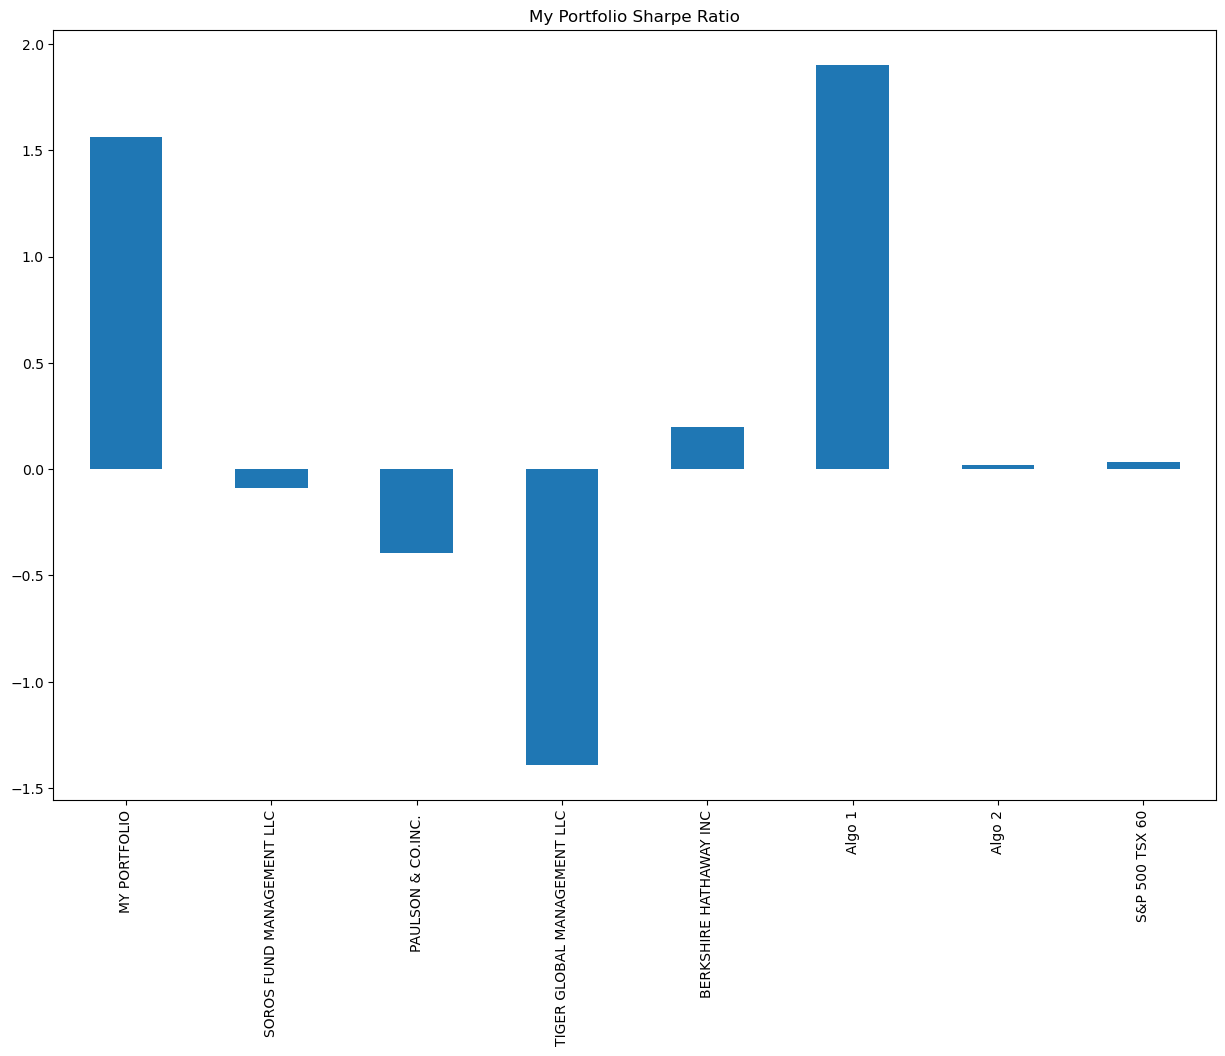

In [188]:
# Visualize the sharpe ratios as a bar plot
all_data_sharpe_ratios.plot(kind='bar',title='My Portfolio Sharpe Ratio',figsize=(15,10))

### How does your portfolio do?

Write your answer here!

In [2]:
#During the year 2018 to 2019, The Sharpe ratio for my portfolio was at 1.56, while other portfolio's sharpe ratio was very less compared to my portfolio. This implies my portfolio is better than other 6 portfolios. Based on these calculations, my portfolio would be able to generate a higher return on a risk-adjusted basis.